In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
path="D:/Study/Deep_Lerarning_Assignments/Final_Prac/TranferLearning/Object Detection(Ass6)/caltech-101-img"
model_path="D:/Study/Deep_Lerarning_Assignments/Final_Prac/TranferLearning/Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [4]:
img_gen=ImageDataGenerator(
    brightness_range=(0.5,1),
    channel_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    validation_split=0.3
)

In [5]:
img_gen_train=img_gen.flow_from_directory(
    directory=path,
    shuffle=True,
    target_size=(224,224),
    batch_size=32,
    subset="training"
)
img_gen_test=img_gen.flow_from_directory(
    directory=path,
    shuffle=True,
    target_size=(224,224),
    batch_size=32,
    subset="validation"
)

Found 6444 images belonging to 102 classes.
Found 2700 images belonging to 102 classes.


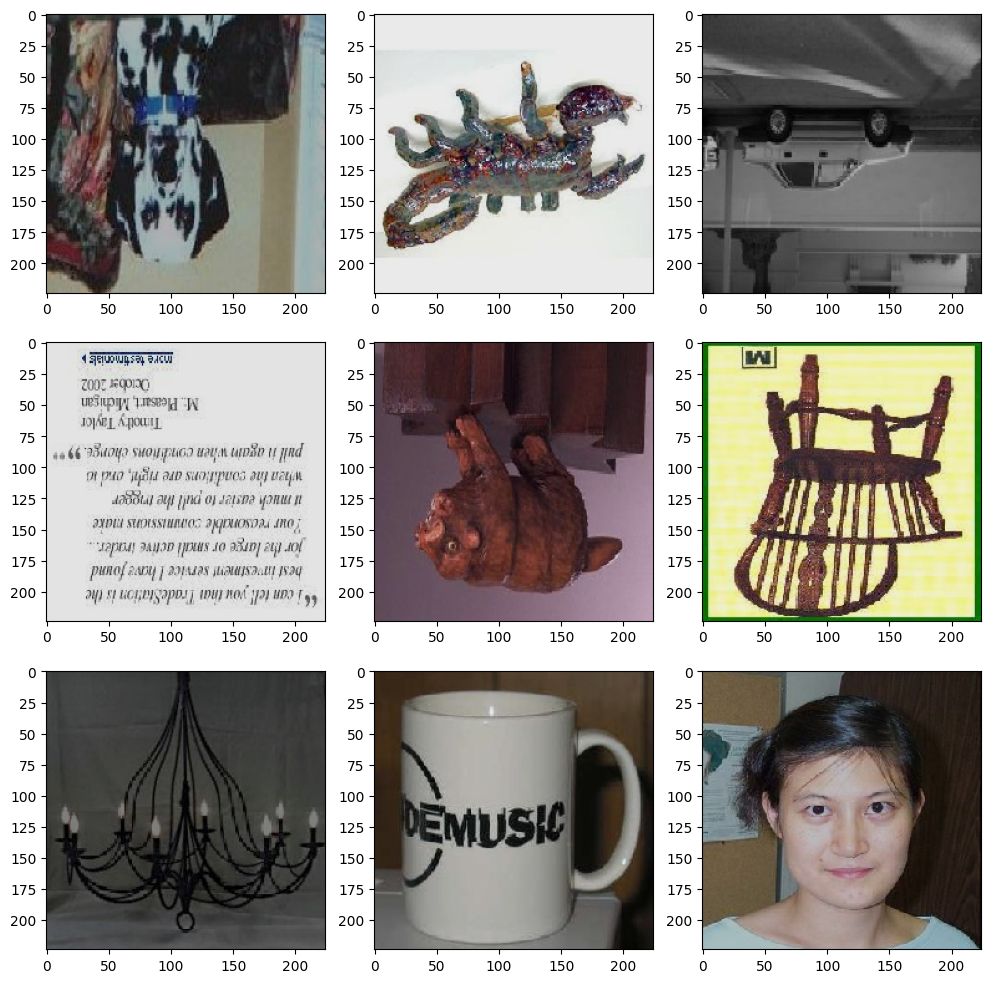

In [6]:
# Fetch a batch of images and labels from the generator
imgs, labels = next(iter(img_gen_train))

# Set up the figure for a 3x3 grid
plt.figure(figsize=(10, 10))

# Display the first 9 images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(imgs[i])

plt.tight_layout()
plt.show()

In [7]:
from tensorflow.keras.applications import VGG16

In [8]:
vgg_model=VGG16(input_shape=(224,224,3),include_top=False,weights=model_path)

In [9]:
vgg_model.trainable=False

In [10]:
from tensorflow.keras.layers import Dense,MaxPool2D,Flatten

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
model=Sequential([
    vgg_model,
    MaxPool2D(),
    Flatten(),
    Dense(102,activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 102)                 │         470,118 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,184,806 (57.93 MB)

 Trainable params: 470,118 (1.79 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
import tensorflow as tf

In [15]:
model.compile(optimizer='adam',metrics=['accuracy'],loss=tf.keras.losses.CategoricalCrossentropy)

In [ ]:
model.fit(img_gen_train,validation_data=img_gen_test,steps_per_epoch=2,epochs=4)

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
2/2 ━━━━━━━━━━━━━━━━━━━━ 2731s 2694s/step - accuracy: 0.0000e+00 - loss: 5.1921 - val_accuracy: 0.0919 - val_loss: 4.7749
Epoch 2/4
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30s/step - accuracy: 0.1328 - loss: 4.2912 

In [ ]:
str